# Dark matter halo analysis tutorial

# Import libraries and modules
- I also change text fonts for figures here because I like Times New Roman.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
import time
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": 'dejavuserif'})
plt.rcParams['axes.formatter.min_exponent']=3

# Plot generating function

In [2]:
def initialize_plot(row=1, col=1, figsize=(8., 7.), gridspec_dict=None):
    fig, ax = plt.subplots(row, col, figsize=figsize, gridspec_kw=gridspec_dict)
    #
    if row==1 and col==1:
        '''
        * Single panel:
        '''
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(3.)
        
        ax.tick_params(axis='both', which='minor', length=6., width=1., labelsize=18.,
                   top=True, right=True, direction='in')
        ax.tick_params(axis='both', which='major', length=10., width=2., labelsize=22.,
                top=True, right=True, direction='in')
    #
    elif row>1 and col>1:
        '''
        * Multiple rows AND multiple columns:
        '''
        for axis in ['top','bottom','left','right']:
            for i in range(row):
                for j in range(col):
                    ax[i][j].spines[axis].set_linewidth(3.)
                    ax[i][j].tick_params(axis='both', which='minor', length=6., width=1., labelsize=18.,
                                        top=True, right=True, direction='in')
                    ax[i][j].tick_params(axis='both', which='major', length=10., width=2., labelsize=20.,
                                        top=True, right=True, direction='in')
    #
    else:
        '''
        * Multiple rows OR multiple columns:
        '''
        # Figure out which of row/col has a number larger than 1.
        maximum = lambda a, b:a if a > b else b
        multiple = maximum(row, col)
        for axis in ['top','bottom','left','right']:
            for i in range(multiple):
                ax[i].spines[axis].set_linewidth(3.)
                ax[i].tick_params(axis='both', which='minor', length=6., width=1., labelsize=18.,
                                    top=True, right=True, direction='in')
                ax[i].tick_params(axis='both', which='major', length=10., width=2., labelsize=20.,
                                    top=True, right=True, direction='in')
    #
    return(fig, ax)

# Object-oriented programming (OOP)
- It is not a "better" way of programming!
- (it kind of is...)

## A very short introduction to OOP and class in Python

# Hernquist model

## Density profile:
- Density profile describes the density of the dark matter halo as a function of distance from the center of the halo.
$$
    \rho\,(r) = \frac{\rho_{\mathrm{0}}}{(\frac{r}{r_{\mathrm{s}}})\,(1+\frac{r}{r_{\mathrm{s}}})^3},
$$
$r_{\mathrm{s}}$ = scale radius,

$\rho_{\mathrm{0}} = M_{\mathrm{total}} \, /\, 2\,\pi\,r_{\mathrm{s}}^3$ = characteristic density

In [3]:
def rho(r, r_s, rho_0):
    return(rho_0 / ((r/r_s)*(1.+ (r/r_s))**3.))

Text(0, 0.5, '$\\rho\\,(r) \\, /\\, \\rho_{\\mathrm{0}}$')

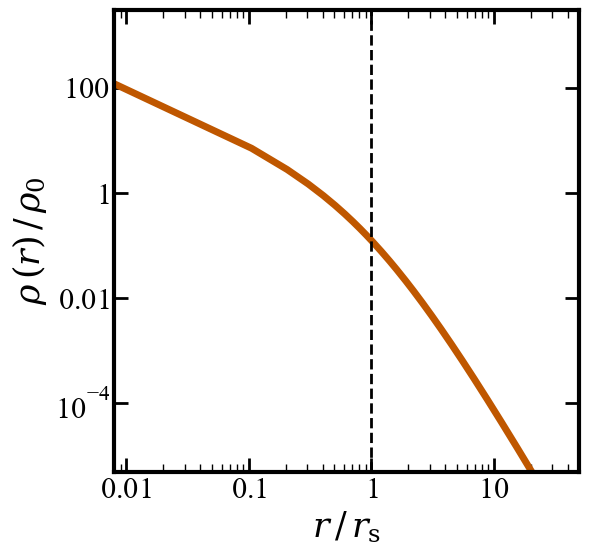

In [4]:
# Initialize the figure.
fig, ax = initialize_plot(1,1, (6., 6))
#
r = np.linspace(0.005, 100., 1000)
r_s = 1.
rho_0 = 1.
rho_hernquist = rho(r, r_s, rho_0)
ax.plot(r, rho_hernquist, linewidth=5., color='#BF5700')
ax.axvline(x=1., linestyle='--', linewidth=2., color='black')
#
# Figure properties
ax.set(xscale='log', yscale='log', xlim=(0.008, 50.), ylim=(5e-6, 3e3))
ax.set_xlabel(r"$r \, / \, r_{\mathrm{s}}$", fontsize=25.)
ax.set_ylabel(r"$\rho\,(r) \, /\, \rho_{\mathrm{0}}$", fontsize=25.)

## Enclosed mass:
$$
    M\,(<r) = 2\,\pi\,\rho_{\mathrm{0}}\,r_{\mathrm{s}}\,\frac{r^2}{(1+\frac{r}{r_{\mathrm{s}}})^2},
$$
$$
    M_{\mathrm{total}} = 2\,\pi\,\rho_{\mathrm{0}}\,r_{\mathrm{s}}^3
$$

## Enclosed number of particles:
$$
    N\,(<r) \sim \frac{r^2}{(1+r)^2}
$$

## Cumulative distribution function (CDF) (normalized by $M_{\mathrm{halo}}$):
$$
    n\,(<r) = \frac{r^2}{(1+r)^2}
$$

## Inverting the CDF lets us to sample values of $r$ for given values of the CDF.
$$
    r = \frac{\sqrt{n}}{1-\sqrt{n}}
$$

In [5]:
def mass(r, r_s, rho_s):
    return(4.*np.pi*rho_s* (r/r_s)**2. / (2.*(1.+r/r_s)**2.))
def cdf(r):
    return(r**2. / (1.+r)**2.)

Text(0, 0.5, 'CDF')

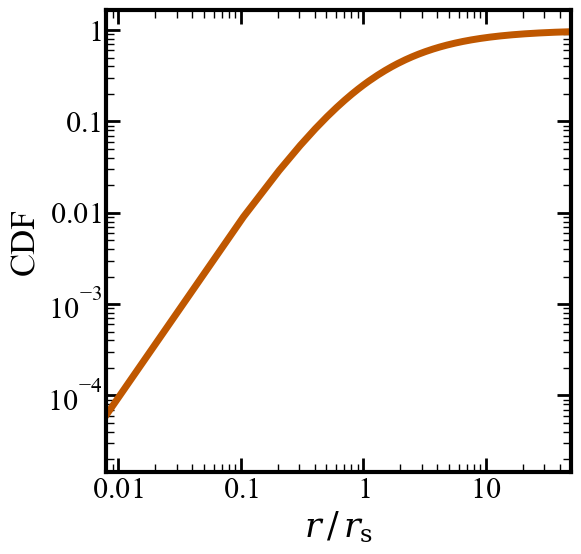

In [6]:
fig, ax = initialize_plot(1,1, (6., 6.))
#
r = np.linspace(0.005, 100., 1000)
r_s = 1.
rho_s = 1.
cummulative_distribution = cdf(r)
ax.plot(r, cummulative_distribution, linewidth=5., color='#BF5700')
#
# Figure properties
ax.set(xscale='log', yscale='log', xlim=(0.008, 50.))
ax.set_xlabel(r"$r \, / \, r_{\mathrm{s}}$", fontsize=25.)
ax.set_ylabel(r"CDF", fontsize=25.)

# Halo class
- The halo class creates an object that contains N randomly sampled particles from the Hernquist dark matter halo model.

In [7]:
class halo():
    '''
    * A class for creating and analyzing an N-body realization of a Hernquist dark matter halo
    '''
    def __init__(self, num_part):
        '''
        * __init__ method initializes the class object with attributes.
        '''
        self.num_particles = num_part
        print(f"* A halo object (an instance of the class 'halo') is initialized with {self.num_particles} particles!")
    #
    def sample_particle_coordinates(self):
        '''
        * This method randomly samples particle coordinates from the Hernquist profile.
        - Inverse CDF
        '''
        # Randomly sample values between 0 and 1 from the uniform distribution.
        uniform_distr_N = np.random.uniform(0., 1., self.num_particles)
        # Invert the CDF to sample distance values.
        self.r = np.sqrt(uniform_distr_N) / (1. - np.sqrt(uniform_distr_N))
        ##self.r = -(uniform_distr_N + np.sqrt(uniform_distr_N)) / (uniform_distr_N - 1.)
        # We want Cartesian x, y, z coordinates of particles not the spherical coordinate r.
        # Randomly sample values of cos(theta): -1 < cos(theta) < 1.
        costheta = np.random.uniform(-1., 1., self.num_particles)
        # Get theta.
        theta = np.arccos(costheta)
        # Randomly sample phi: theta could have also been sampled this way.
        phi = np.random.uniform(0., 1., self.num_particles) * 2.*np.pi
        # Compute the x, y, and z coordinates using r, theta, and phi.
        self.x = self.r * np.sin(theta) * np.cos(phi)
        self.y = self.r * np.sin(theta) * np.sin(phi)
        self.z = self.r * np.cos(theta)
    #
    def compute_density_profile(self, num_bins, max_r, particle_mass=1.):
        '''
        * This method computes the density profile, rho(r), for the halo.
        - Input:
          - num_bins: number of distance bins to use to compute the density profile.
          - max_r: the maximum distance to compute the density out to.
          - particle_mass: the mass of the particles, set to 1 to get the number density rather than the physical density of particles.
        - Returns:
          - density array
          - enclosed particle number array
        '''
        # Only use particles within max_r
        idx_to_use = np.where(self.r <= max_r)[0]
        r_to_use = self.r[idx_to_use]
        # Sort the distance array.
        sort_idx = np.argsort(r_to_use)
        sorted_dist = r_to_use[sort_idx]
        # r_min is not the smallest distance value!
        # The first few bins often have too few particles if the first bin is from the first index.
        if self.num_particles >= 1000:
            first_idx = 10
        elif self.num_particles < 1000:
            first_idx = int(0.01*self.num_particles)
        r_min = np.log10(sorted_dist[first_idx])
        r_max = np.log10(sorted_dist[-1])
        # Set distance bins.
        r_bins = np.logspace(r_min, r_max, num_bins+1)
        bin_left = r_bins[:-1]
        bin_right = r_bins[1:]
        # sqrt(a * b) works because the midpoint of two points logarithmically is exp((log(a) + log(b))/2).
        bin_mid = (bin_left * bin_right) ** 0.5
        # Width of the bin
        shell_volume = 4. * np.pi / 3. * (bin_right**3. - bin_left**3.)
        # Number of particles within the bin left points
        num_within_left = np.searchsorted(sorted_dist, bin_left)
        # Number of particles within the bin right points
        num_within_right = np.searchsorted(sorted_dist, bin_right)
        # Number or enclosed particles for distance points in bin_mid.
        num_enclosed = np.searchsorted(sorted_dist, bin_mid)
        # Number of particles within the shell
        num_shell = num_within_right - num_within_left
        # Mass of the shells
        shell_mass = particle_mass * num_shell
        # Shell density
        shell_density = shell_mass / shell_volume
        # rho_0 is total mass divided by 2pi.
        rho_0 = self.num_particles * particle_mass / 2. / np.pi
        # Normalize the density profile by rho_0.
        shell_density_normalized = shell_density / rho_0
        # Assign results to the halo object.
        self.bin_midpoints = bin_mid
        self.density_array = shell_density_normalized
        self.num_enclosed_particles = num_enclosed

# Create a few instances of the halo class with different particle numbers.

In [8]:
# Set the number of particles.
num_part = 200
# Create the halo object.
halo_obj_1 = halo(num_part)

* A halo object (an instance of the class 'halo') is initialized with 200 particles!


In [9]:
# Set the number of particles.
num_part = 10000
# Create the halo object.
halo_obj_2 = halo(num_part)

* A halo object (an instance of the class 'halo') is initialized with 10000 particles!


In [10]:
# Set the number of particles.
num_part = 1000000
# Create the halo object.
halo_obj_3 = halo(num_part)

* A halo object (an instance of the class 'halo') is initialized with 1000000 particles!


# Create an N-body realization of the halo particles.
- Randomly sample x, y, and z coordinates.

In [11]:
# Use the class method 'sample_particle_coordinates' to assign x, y, z coordinates.
halo_obj_1.sample_particle_coordinates()
halo_obj_2.sample_particle_coordinates()
halo_obj_3.sample_particle_coordinates()

# Plot a 2D projection of particles.

Text(7.0, 35.0, '$N=$1000000')

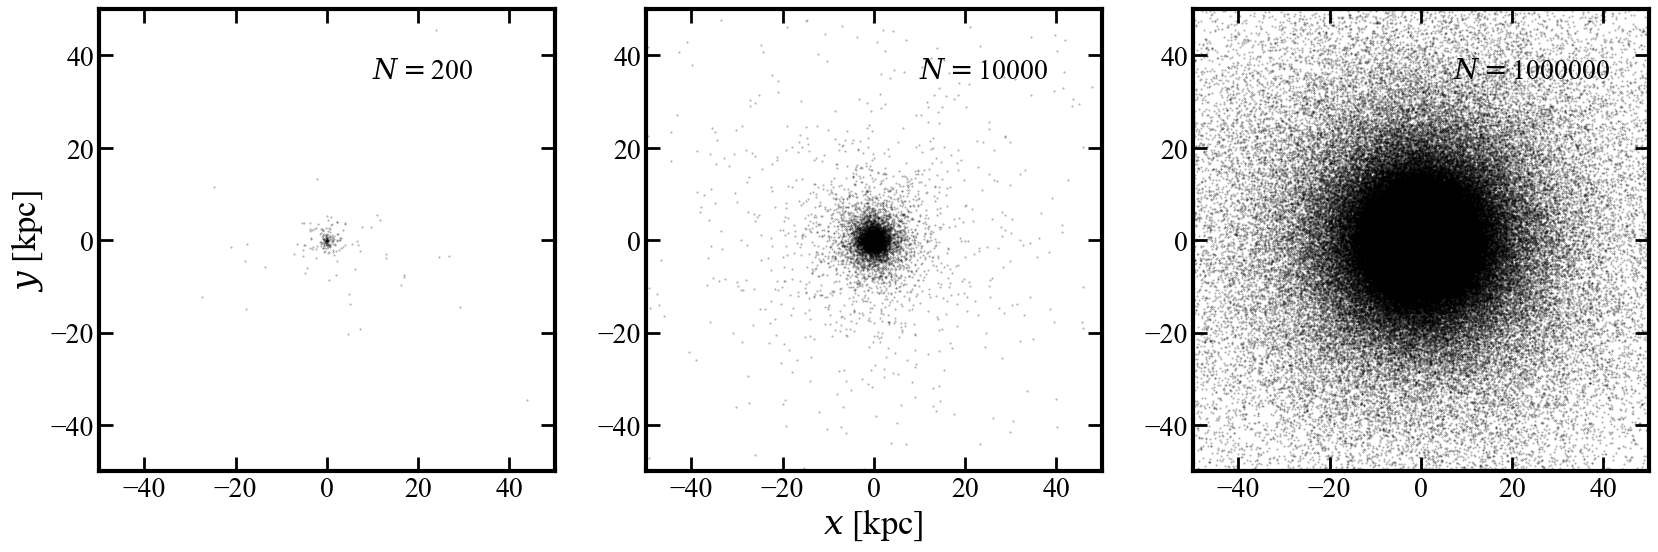

In [12]:
# Initialize the figure.
fig, ax = initialize_plot(1,3, figsize=(20., 6))
# Plot particles.
ax[0].plot(halo_obj_1.x, halo_obj_1.y, 'o', markersize=0.4, alpha=0.4, c='black', rasterized=True)
ax[1].plot(halo_obj_2.x, halo_obj_2.y, 'o', markersize=0.4, alpha=0.4, c='black', rasterized=True)
ax[2].plot(halo_obj_3.x, halo_obj_3.y, 'o', markersize=0.4, alpha=0.4, c='black', rasterized=True)
'''
Figure properties
'''
# x and y axes labels: using r before "" allows us to use Latex expressions.
ax[0].set_ylabel(r"$y$ [kpc]", fontsize=25.)
ax[1].set_xlabel(r"$x$ [kpc]", fontsize=25.)
# Set x and y ranges to show.
ax[0].set(xlim=(-50., 50), ylim=(-50., 50))
ax[1].set(xlim=(-50., 50), ylim=(-50., 50))
ax[2].set(xlim=(-50., 50), ylim=(-50., 50))
# Write numbers of particles.
# ax.text(x_location, y_location, text, fontsize)
ax[0].text(10., 35., f"$N=${halo_obj_1.num_particles}", fontsize=20.)
ax[1].text(10., 35., f"$N=${halo_obj_2.num_particles}", fontsize=20.)
ax[2].text(7., 35., f"$N=${halo_obj_3.num_particles}", fontsize=20.)

# Compute the density profile.
- Use the compute_density_profile method of the halo class.

In [13]:
# Parameters
max_r = 50.
num_bins = 30
particle_mass = 1.
# Instead of doing it manually three times, we can use a loop.
for obj in [halo_obj_1, halo_obj_2, halo_obj_3]:
    obj.compute_density_profile(num_bins, max_r, particle_mass)

# Plot the density profile.

/var/folders/4k/7k3qyk7d3qb2fcwqc4mmg4k40000gn/T/ipykernel_8289/4128695841.py:20: RuntimeWarning: divide by zero encountered in divide
  rho_difference = 1. - rho_analytic / halo_object.density_array


Text(0, 0.5, '$1 - \\frac{\\rho_{\\mathrm{analytic}}}{\\rho_{\\mathrm{data}}}$')

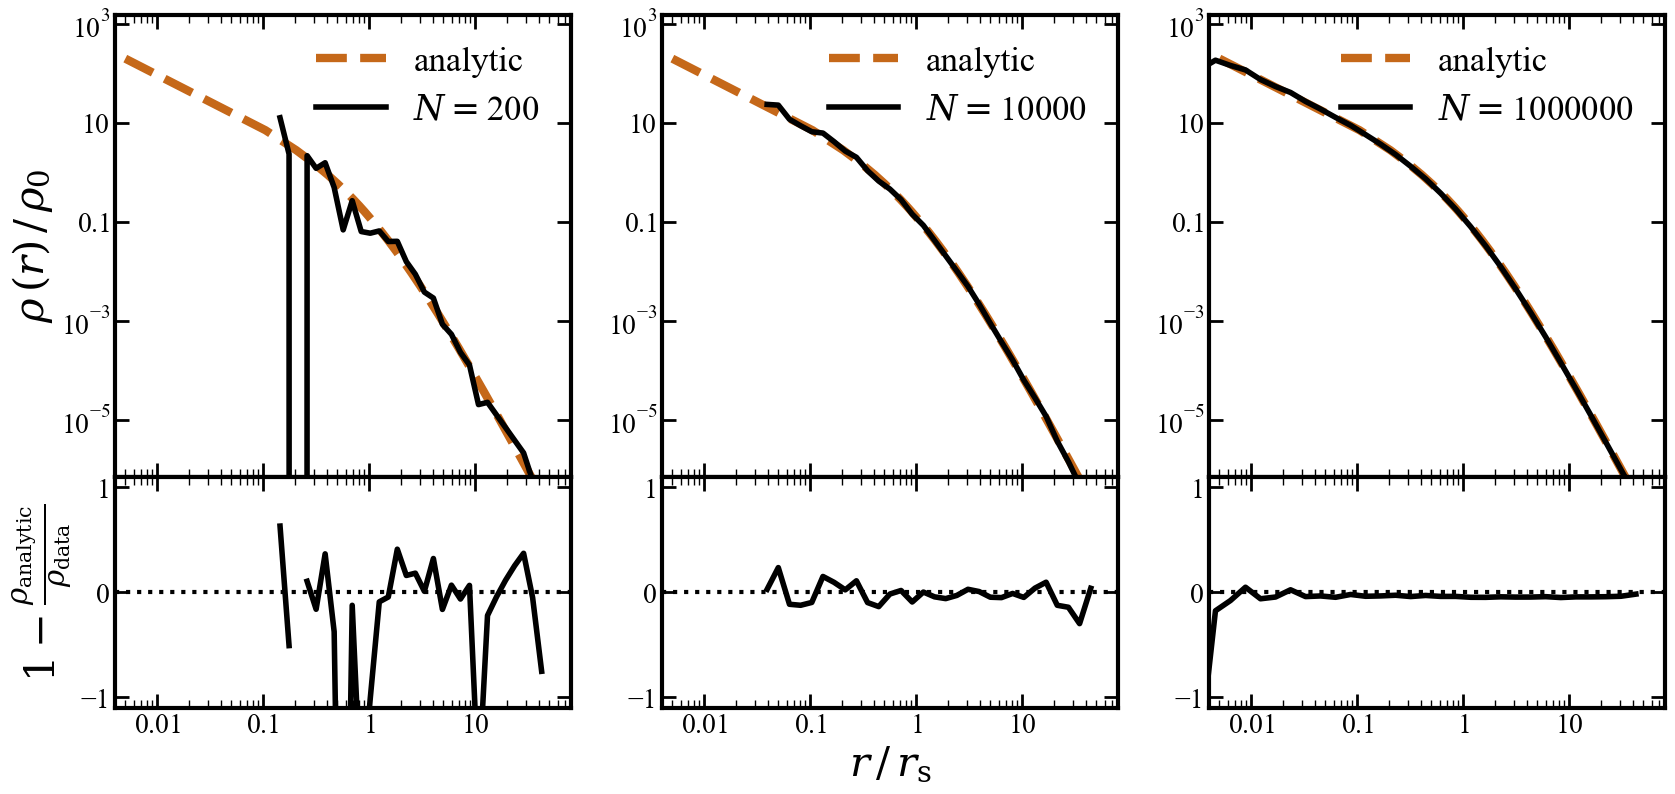

In [14]:
# Initialize the figure.
fig, ax = initialize_plot(2,3, figsize=(20., 9), gridspec_dict={'height_ratios': [2, 1]})
plt.subplots_adjust(hspace=0.)
# Plot the analytic Hernquist density profile as comparison.
r = np.linspace(0.005, 100., 1000)
r_s = 1.
rho_0 = 1.
rho_analytic = rho(r, r_s, rho_0)
for i in range(3):
    ax[0][i].plot(r, rho_analytic, linestyle='--', linewidth=6., color='#BF5700', alpha=0.9, label='analytic')
# Top panels: plot density profiles.
halo_objects = [halo_obj_1, halo_obj_2, halo_obj_3]
for i in range(len(halo_objects)):
    halo_object = halo_objects[i]
    ax[0][i].plot(halo_object.bin_midpoints, halo_object.density_array, c='black', linewidth=4., label=f'$N=${halo_object.num_particles}')
# Bottom panels: plot comparisons.
for i in range(len(halo_objects)):
    halo_object = halo_objects[i]
    rho_analytic = rho(halo_object.bin_midpoints, r_s, rho_0)
    rho_difference = 1. - rho_analytic / halo_object.density_array
    ax[1][i].axhline(y=0., linestyle=':', linewidth=3., c='black')
    ax[1][i].plot(halo_object.bin_midpoints, rho_difference, c='black', linewidth=4.)
# Legend
for i in range(3):
    ax[0][i].legend(fontsize=25., frameon=False, loc=1)
'''
Figure properties
'''
for i in range(3):
    ax[0][i].set(xscale='log', yscale='log', xlim=(4e-3, 8e1), ylim=(7e-7, 1.5e3))
    ax[1][i].set(xscale='log', xlim=(4e-3, 8e1), ylim=(-1.1, 1.1))
ax[0][0].set_ylabel(r"$\rho\,(r)\,/\,\rho_{\mathrm{0}}$", fontsize=30.)
ax[1][1].set_xlabel(r"$r\, /\, r_{\mathrm{s}}$", fontsize=30.)
ax[1][0].set_ylabel(r"$1 - \frac{\rho_{\mathrm{analytic}}}{\rho_{\mathrm{data}}}$", fontsize=30.)

# Compute the circular velocity profile.
$$
    V_{\mathrm{circ}} = \sqrt{\frac{G\,M\,(<r)}{r}}
$$

In [ ]:
def compute_Vcirc():
    '''
    * This method computes the circular velocity profile for the halo.
    - Input:
      - num_bins: number of distance bins to use to compute the density profile.
      - max_r: the maximum distance to compute the density out to.
      - particle_mass: the mass of the particles, set to 1 to get the number density rather than the physical density of particles.
    - Returns:
      - Vcirc array
      - Radial distance array
    '''